In [67]:
import pandas as pd
import matplotlib.pyplot as plt

## Get data

In [118]:
df = pd.read_clipboard(sep=',')
df

,STN,YYYYMMDD,TG,TN,TX
0,260,20220101,123,109,132
1,260,20220102,117,102,130
2,260,20220103,97,88,110
3,260,20220104,65,32,89
4,260,20220105,51,23,76
...,...,...,...,...,...
725,279,20221227,50,28,66
726,279,20221228,83,52,104
727,279,20221229,91,66,111
728,279,20221230,80,41,128


In [122]:
df = pd.read_csv('knmi.csv')

In [120]:
df.columns = df.columns.str.strip()

In [121]:
df.to_csv('knmi.csv', index = False)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   STN       730 non-null    int64
 1   YYYYMMDD  730 non-null    int64
 2   TG        730 non-null    int64
 3   TN        730 non-null    int64
 4   TX        730 non-null    int64
dtypes: int64(5)
memory usage: 28.6 KB


## conversion

In [124]:
df['temperature'] = df['TG']/10

In [125]:
df['dd'] = pd.to_datetime(df['YYYYMMDD'], format = '%Y%m%d')

In [126]:
stations = {
    260: 'De Bilt',
    279: 'Hoogeveen'
}

df['station'] = df['STN'].replace(stations)

In [127]:
columns = ['dd','station','temperature']
df = df[columns]
df

,dd,station,temperature
0,2022-01-01,De Bilt,12.3
1,2022-01-02,De Bilt,11.7
2,2022-01-03,De Bilt,9.7
3,2022-01-04,De Bilt,6.5
4,2022-01-05,De Bilt,5.1
...,...,...,...
725,2022-12-27,Hoogeveen,5.0
726,2022-12-28,Hoogeveen,8.3
727,2022-12-29,Hoogeveen,9.1
728,2022-12-30,Hoogeveen,8.0


In [130]:
df_unstacked = pd.pivot(df, columns = 'station', index = 'dd', values = 'temperature')

In [131]:
df_unstacked = df.set_index(['dd','station']).unstack()
df_unstacked

temperature          
station        De Bilt Hoogeveen
dd                              
2022-01-01        12.3      12.0
2022-01-02        11.7      11.1
2022-01-03         9.7       9.2
2022-01-04         6.5       5.5
2022-01-05         5.1       4.4
...                ...       ...
2022-12-27         5.7       5.0
2022-12-28         9.2       8.3
2022-12-29         9.2       9.1
2022-12-30         8.5       8.0
2022-12-31        14.0      13.2

[365 rows x 2 columns]

## Analyse

(array([1, 2]),
 [Text(1, 0, '(temperature, De Bilt)'),
  Text(2, 0, '(temperature, Hoogeveen)')])

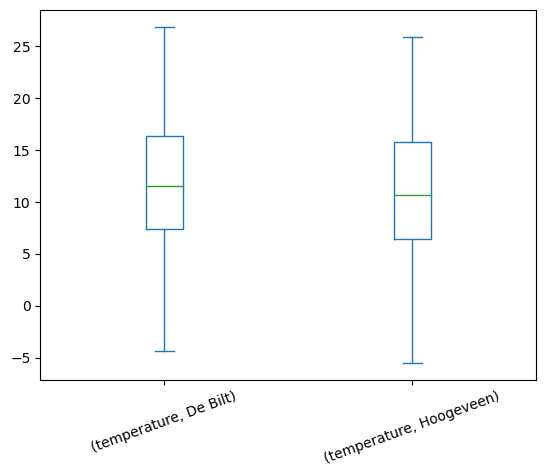

In [81]:
df_unstacked.plot.box()
plt.xticks(rotation = 20)

<AxesSubplot: xlabel='dd'>

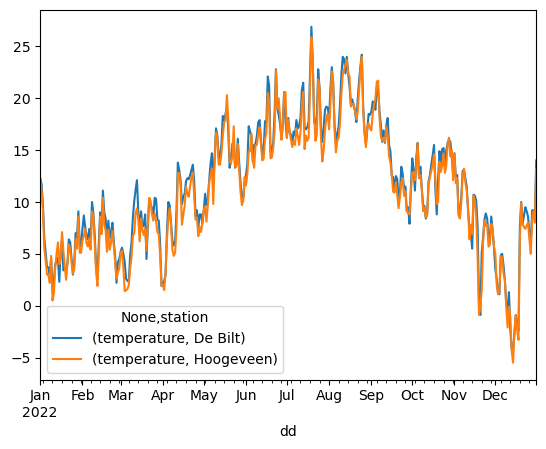

In [132]:
df_unstacked.plot.line()

## Temperatuurverschil

In [134]:
diff = df_unstacked.iloc[:,1] - df_unstacked.iloc[:,0]
diff

dd
2022-01-01   -0.3
2022-01-02   -0.6
2022-01-03   -0.5
2022-01-04   -1.0
2022-01-05   -0.7
             ... 
2022-12-27   -0.7
2022-12-28   -0.9
2022-12-29   -0.1
2022-12-30   -0.5
2022-12-31   -0.8
Length: 365, dtype: float64

/var/folders/03/yj771kx92fj0g_3xbr70x6980000gn/T/ipykernel_36482/3000399937.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


<AxesSubplot: >

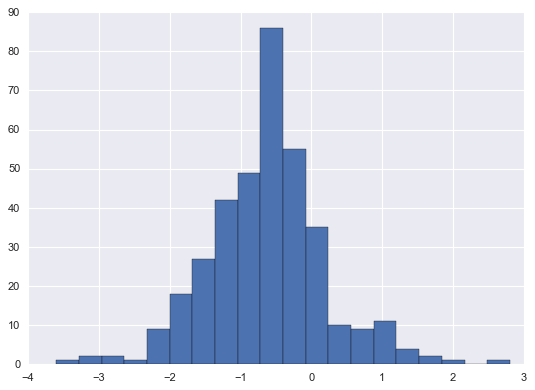

In [145]:
import matplotlib as mpl
mpl.style.use('seaborn')

diff.hist(bins = 20)

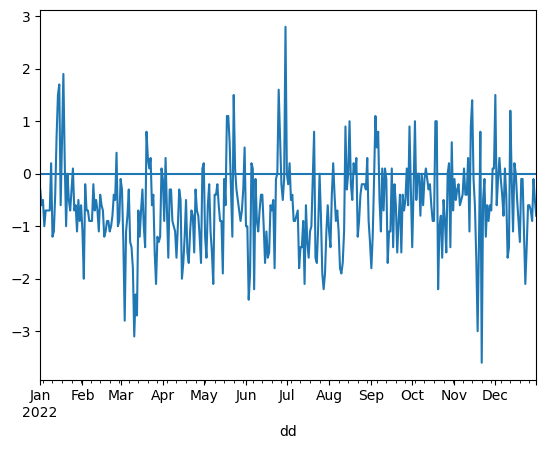

In [140]:
diff.plot()
plt.axhline(0)